In [22]:
import cv2
import pysift as sift
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Load data
im_org = cv2.imread("data/test_blob_uniform.png", cv2.IMREAD_GRAYSCALE)
im_rotated = cv2.imread("data/test_blob_uniformrot_22dot5deg.png", cv2.IMREAD_GRAYSCALE)

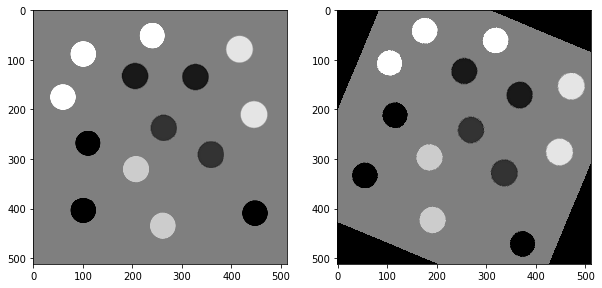

In [9]:
# Visualize
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(im_org)
plt.subplot(1,2,2)
plt.imshow(im_rotated)
plt.show()

In [18]:
# Extract sift keypoints and descriptors
kp_org, dsc_org = sift.computeKeypointsAndDescriptors(im_org)
kp_rotated, dsc_rotated = sift.computeKeypointsAndDescriptors(im_rotated)

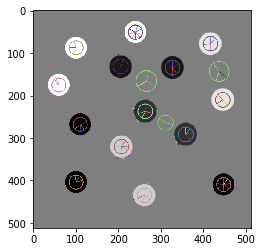

In [27]:
# Visualize the keypoints
im_org_kp = cv2.drawKeypoints(im_org, kp_org, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_org_kp)

In [19]:
# Create function to normalize and threshold descriptor
def normalizeAndThresh(des):
    # Normalize to unit length
    des = des/np.sqrt(np.sum(des**2))
    
    # thresholding
    des[des>0.2] = 0.2
    
    # Normalizing again
    des = des/np.sqrt(np.sum(des**2))
    return des

In [20]:
# Match features
NO_FILTERING = 0
FILTERING = 1
SYMMETRY = 2

def match_images(im1, im2, match_type):
    if match_type == NO_FILTERING:
        matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
        matches = matcher.match(im1,im2)
    elif match_type == FILTERING:
        matcher = cv2.BFMatcher()
        matches = np.array(matcher.knnMatch(im1,im2, k=2))
        eta = np.array([match[0].distance / match[1].distance for match in matches])
        matches = matches[eta<0.6,0]
    elif match_type == SYMMETRY:
        matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
        matches = matcher.match(im1,im2)
        
    return sorted(matches, key = lambda x:x.distance)

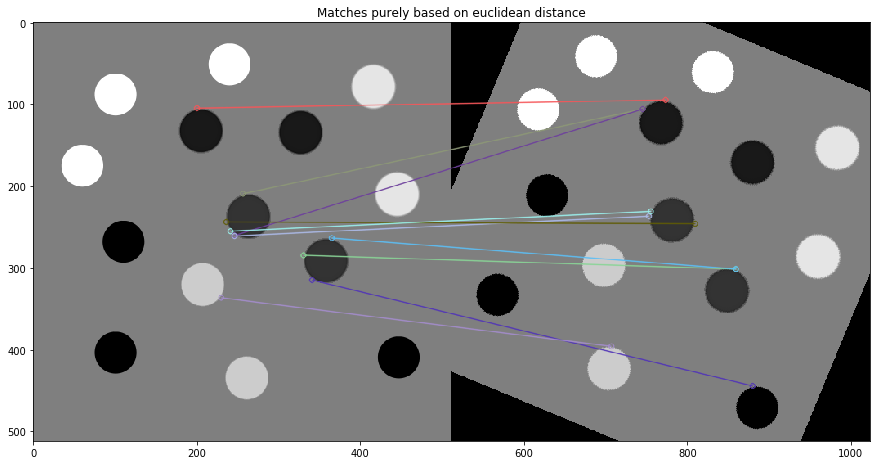

In [26]:
# Normalize and threshold descriptors
dsc_org_normalized = normalizeAndThresh(dsc_org)
dsc_rotated_normalized = normalizeAndThresh(dsc_rotated)

# Match image keypoints based on their descriptor 
matches = match_images(dsc_org_normalized, dsc_rotated_normalized, NO_FILTERING)

# Illustrate matches
plt.figure(figsize=(15,15))
plt.imshow(cv2.drawMatches(im_org, kp_org, im_rotated, kp_rotated, matches[:10], None, flags=2))
plt.title('Matches purely based on euclidean distance')
plt.show()